# Trabajo Parcial - Física

# 1. Movimiento de un paracaidista

## a. Parámetros

|               Parámetros                           |       Valores      |
|:----------------------------------------------------|:------------------:|
| Coeficiente de resistencia (C<sub>D</sub>)         |     1,17           |
| Densidad del aire (kg/m<sup>3</sup>)               |     1,20           | 
| Masa del paracaidista (kg)                         |     80, 0          | 
| Área transversal del paracaidista (m<sup>2</sup>)  |    [6,00; 10,0]    | 
| Rapidez inicial (m/s)                              |    [0,00; 5,00]    | 
| Tiempo en que abre el paracaídas (s)               |    [15,0; 23,0]    |
| Altura inicial (m)                                 |    [3 000; 3 500]   |

In [3]:
import matplotlib.pyplot as plt
import random

resistencia = 1.17
densidad_aire = 1.20
masa = 80.00
area = float(format(random.uniform(6, 10), '.2f'))
rapidez_i = float(format(random.uniform(0, 5), '.2f'))
tiempo_abre_paracaidas = float(format(random.uniform(15, 23), '.2f'))
altura_i = float(format(random.uniform(3000,3500), '.2f'))

gravedad = -9.81
k = (resistencia * densidad_aire * area) / 2

In [4]:
print("Resistencia: {0:.2f}".format(resistencia))
print("Densidad del aire: {0:.2f}".format(densidad_aire))
print("Masa del paracaidista: {0:.2f}".format(masa))
print("Area transversal paracaidista: ", area)
print("Rapidez inicial: ",rapidez_i)
print("Tiempo en que se abre el paracaidas: ", tiempo_abre_paracaidas)
print("Altura inicial: ", altura_i)
print("Gravedad: ", gravedad)
print("Constante 'k': {0:.2f}".format(k))

Resistencia: 1.17
Densidad del aire: 1.20
Masa del paracaidista: 80.00
Area transversal paracaidista:  9.7
Rapidez inicial:  0.18
Tiempo en que se abre el paracaidas:  22.95
Altura inicial:  3425.05
Gravedad:  -9.81
Constante 'k': 6.81


## b. Generación de datos (posición, velocidad y aceleración)

$$tap = tiempo\hspace{1mm}abre\hspace{1mm}paracaidas$$

$$tde = tiempo\hspace{1mm}de\hspace{1mm}equilibrio$$

### Posición

$$x_{(t)} =     \left \{ \begin{array}{rcl}
x_0 + v_0t + \frac{1}{2}at^2 & \mbox{,} & 0\leq t < tap \\ 
x_{(tap)}+ v_{(tap)}t + \frac{1}{2}a_{(t)}(t-tap)^2 & \mbox{,} & tap \leq t < tde \\
x_{(tde)} + v(t-tde) & \mbox{,} & tde \leq t < tiempo\hspace{1mm}final
\end{array}\right.$$

### Velocidad

$$v_{(t)} =     \left \{ \begin{array}{rcl}
v_0 + at & \mbox{,} & 0\leq t < tap \\ 
v_{(tap)} + a_{(t)}(t-tap) & \mbox{,} & tap \leq t < tde \\
\sqrt{\frac{m \mid g \mid}{k}} & \mbox{,} & tde \leq t \leq tiempo\hspace{1mm}final
\end{array}\right.$$

### Aceleración

$$a_{(t)} =     \left \{ \begin{array}{rcl}
g & \mbox{,} & 0\leq t < tap \\ 
{\displaystyle \frac{mg + kv_{(t)}^2}{m}}  & \mbox{,} & tap \leq t < tde \\
0 & \mbox{,} & tde \leq t \leq tiempo\hspace{1mm}final
\end{array}\right.$$

In [19]:
import math

posicion = []
velocidad = []
aceleracion = []
fuerza = []
tiempo = []

tap = tiempo_abre_paracaidas

t = 0
dt = 0.001
v = rapidez_i + gravedad * tap
a = (masa * gravedad + k * pow(v, 2)) / masa
f = masa * a
x = altura_i + (rapidez_i + v) * tap / 2

tiempo.append(t + tap)
velocidad.append(v)
aceleracion.append(a)
fuerza.append(f)
posicion.append(x)

##while ( a > 0):
for i in range(0, 10000):
    t = t + dt      
    v = v + a * dt
    a = (masa * gravedad + k * pow(v, 2)) / masa
    f = masa * a
    x = x + ((velocidad[-1] + v) * dt / 2)
    tiempo.append(t + tap)
    velocidad.append(v)
    aceleracion.append(a)
    fuerza.append(f)
    posicion.append(x)
    
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step
        
def setPlot(a, b):
    width = a
    height = b
    plt.figure(figsize=(width, height))
    

## c. Gráficos

In [20]:
print(len(tiempo))
print(tiempo[0], tiempo[-1], tiempo[-1] -tiempo[0])
print(velocidad[0], velocidad[-1])
print(aceleracion[0], aceleracion[-1])

10001
22.95 32.949999999999896 9.999999999999897
-224.9595 -10.735569379031835
4297.712310676479 4.0368281730707165e-07


### 5. Comparativa de la velocidad, aceleración y posición durante la resolucion de las ecuaciones diferenciales

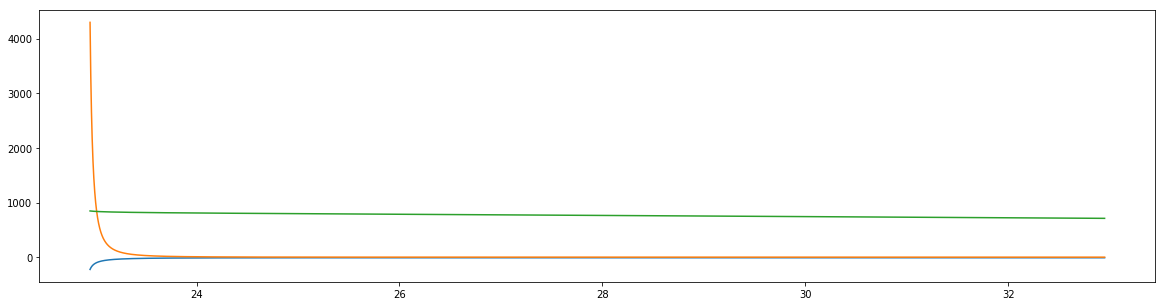

In [21]:
setPlot(20, 5)
plt.plot(tiempo, velocidad)
plt.plot(tiempo, aceleracion)
plt.plot(tiempo, posicion)
plt.show()